Main script notebook version

In [1]:
import matplotlib.pyplot as plt
from keras.models import *
from keras.layers import *
import cv2
import numpy as np
import random
# from keras.callbacks import TensorBoard

random.seed = 10

#Conventie: genereer x_train, x_val 1 keer en houdt in spyder variable storage
#          gebruik X_train en X_store voor aanpassingen.
if not 'x_train' in globals():
    from project_dataset_script_v2 import x_train, x_val
    
print(x_train.shape)    
num_classes = 5
X_train = x_train
X_val = x_val
#X_train_gray_flat = np.array(X_train_gray)

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


1489 training images from 5 classes
1470 validation images from 5 classes
(1489, 128, 128, 3)


In [2]:
n_epochs = 1
n_batches = 32

n, img_rows, img_cols, n_channels = x_train.shape

input_img = Input(shape=(img_rows, img_cols, n_channels))

x = Conv2D(64, 3, activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x)
x = MaxPool2D((2,2), padding='same')(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x)
x = MaxPool2D((2,2), padding='same')(x)

x = Conv2D(32, 3, activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(3, 3, activation='sigmoid', padding='same')(x)

#Model initialization and compile
print('Now compiling autoencoder')
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Instructions for updating:
Colocations handled automatically by placer.
Now compiling autoencoder


In [3]:
history = autoencoder.fit(x_train, x_train, 
                epochs=n_epochs,
                batch_size=n_batches,
                verbose=1,
                validation_data=(x_val,x_val)
                )

Instructions for updating:
Use tf.cast instead.
Train on 1489 samples, validate on 1470 samples
Epoch 1/1
1489/1489 [==============================] - 154s 104ms/step - loss: 0.6229 - val_loss: 0.5733


Reconstruction error on entire dataset: 0.1334


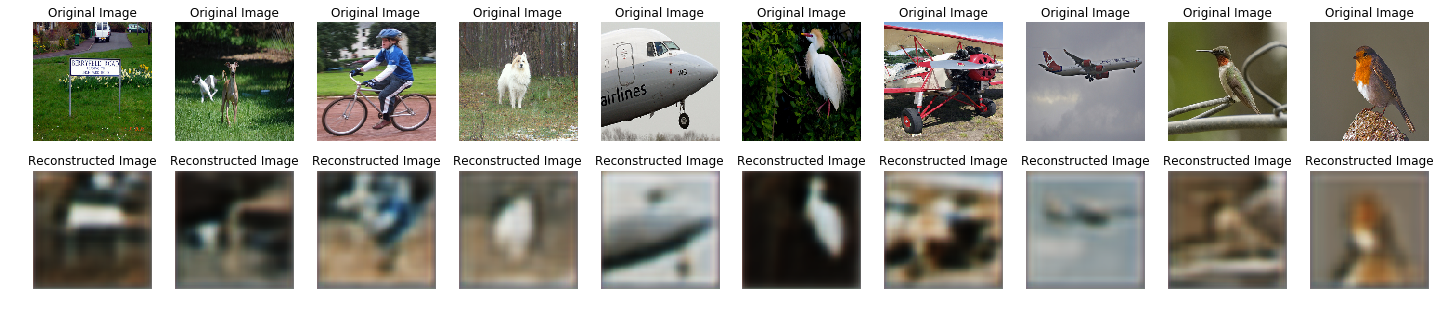

In [4]:
random_indices = [random.randint(0, x_val.shape[0]) for i in range(10)] 
reconstruction_error_list = []
val_images = autoencoder.predict(x_val)
fig = plt.figure(figsize=(25,5))
ax = fig.subplots(2, 10)
i=0
for index in random_indices:
   dec = val_images[index]
   act = x_val[index].astype('float32')
   reconstruction_error_list.append(np.mean(((dec-act)*(dec-act))))
   ax[0,i].imshow(act)
   ax[0,i].axis('off')
   ax[0,i].set_title('Original Image', fontdict={'fontsize': 12, 'fontweight': 'medium'})
   ax[1,i].imshow(dec)
   ax[1,i].axis('off')
   ax[1,i].set_title('Reconstructed Image', fontdict={'fontsize': 12, 'fontweight': 'medium'})
   i = i+1
print('Reconstruction error on entire dataset: ' + str(np.round(np.sqrt(np.mean(reconstruction_error_list)),4)))
plt.show()

In [7]:
# serialize model to JSON
model_json = autoencoder.to_json()
with open("autoencoder.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
autoencoder.save_weights("autoencoder.h5")
# with open('autoencoder_history_dict', 'wb') as file_pi:
#     pickle.dump(history.history, file_pi)

print("Saved model & history to disk")

Saved model & history to disk
